In [ ]:
# https://www.berlin.de/polizei/aufgaben/verkehrssicherheit/verkehrsunfallstatistik/

In [199]:
import pandas as pd
import tabula
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
def create_month_col(m:[str]=None, y:[str]="2020"):
    if len(str(m)) == 1:
        return str(y)+"_0"+str(m)
    else:
        return str(y)+"_"+str(m)

In [144]:
create_month_col("2")

'2018_02'

### Loading cleaned dataset and create a new csv file per year, grouped by month

In [105]:
data_ = pd.read_csv("./data/cleaned_data.csv")

#### 2018

In [156]:
data_18 = data_[data_.ujahr == 2018]

In [157]:
data_18

,ujahr,umonat,weekday,uwochentag,long,lat,time_of_day,ustunde,light_condition,ulichtverh,...,uart,utyp1,ist_rad,ist_pkw,ist_fuss,ist_krad,ist_gkfz,ist_sonstige,ukategorie,accident_outcome
0,2018,1,Wed,4,52.513597,13.475018,afternoon,15,daylight,0,...,6,4,0,1,1,0,0,0,3,slightly_injured
1,2018,1,Mon,2,52.587259,13.291022,morning,11,daylight,0,...,2,6,0,1,0,0,0,0,3,slightly_injured
2,2018,1,Tue,3,52.526019,13.420578,morning,9,daylight,0,...,6,4,0,1,1,0,0,0,3,slightly_injured
3,2018,1,Mon,2,52.481844,13.348288,afternoon,17,dark,2,...,6,7,0,1,1,0,0,0,3,slightly_injured
4,2018,1,Wed,4,52.583472,13.403228,afternoon,15,dusk,1,...,6,7,1,0,1,0,0,0,3,slightly_injured
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647,2018,12,Fri,6,52.514261,13.266868,morning,10,daylight,0,...,5,3,0,1,0,0,0,0,3,slightly_injured
13648,2018,12,Fri,6,52.563879,13.460732,morning,10,daylight,0,...,5,7,1,1,0,0,0,0,3,slightly_injured
13649,2018,12,Fri,6,52.527412,13.451028,morning,9,daylight,0,...,2,6,0,1,0,0,0,0,3,slightly_injured
13650,2018,12,Fri,6,52.525101,13.461215,morning,9,dusk,1,...,0,7,1,0,0,0,0,0,2,seriously_injured


+ dropping columns not needed for accumulation

In [158]:
data_18 = data_18[['umonat', 'ist_rad', 'ist_pkw', 'ist_fuss', 'ist_krad', 'ist_gkfz', 'ist_sonstige', 'accident_outcome']]

+ creating new columns for every outcome 1 or 0 and dropping accident_outcome

In [159]:
for o in ["slightly_injured", "seriously_injured", "killed"]:
    data_18[o] = list(map(lambda x: 1 if x == o else 0, data_18.accident_outcome))
data_18.drop(["accident_outcome"], axis=1, inplace=True)

C:\Users\roman\AppData\Local\Temp/ipykernel_14924/959200027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_18[o] = list(map(lambda x: 1 if x == o else 0, data_18.accident_outcome))
C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [160]:
data_18 = data_18.groupby("umonat").agg(sum)


In [161]:
# create year_month column
data_18["month"] = list(map(create_month_col, data_18.index))
data_18.reset_index(level=0, inplace=True)
data_18.drop(["umonat"], axis=1, inplace=True)
data_18

,ist_rad,ist_pkw,ist_fuss,ist_krad,ist_gkfz,ist_sonstige,slightly_injured,seriously_injured,killed,month
0,245,758,247,50,28,129,720,161,3,2018_01
1,201,640,153,39,30,101,608,119,3,2018_02
2,222,700,154,65,27,110,691,109,2,2018_03
3,453,1008,148,214,38,168,1011,202,4,2018_04
4,679,1174,190,257,62,184,1199,261,2,2018_05
5,647,1153,177,289,46,183,1251,212,3,2018_06
6,547,987,125,241,41,162,1054,179,3,2018_07
7,553,1017,135,274,32,179,1085,223,4,2018_08
8,572,1027,150,292,42,148,1100,223,5,2018_09
9,448,1037,176,225,42,177,1059,186,3,2018_10


In [162]:
tables = tabula.read_pdf("./pdfs/alkohol2018.pdf", pages = "all", multiple_tables = True)

In [163]:
dui_2018 = list(tables[3].iloc[0])
dui_2018

['Anzahl',
 '89',
 '100',
 '108',
 '101 132',
 '106',
 '124',
 '106',
 '117',
 '96',
 nan,
 118.0,
 137.0,
 1334.0]

In [164]:
# cleanup and add column
dui_2018_ = dui_2018[1:-1]
dui_2018_[3] = "101"
dui_2018_.insert(4, "132")
del(dui_2018_[10])
data_18["alcohol_related"] = [int(_) for _ in dui_2018_]

In [168]:
# reorder columns
data_18 = data_18[['month', 'ist_rad', 'ist_pkw', 'ist_fuss', 'ist_krad', 'ist_gkfz', 'ist_sonstige', 'slightly_injured',
                   'seriously_injured', 'killed', 'alcohol_related']]

,month,ist_rad,ist_pkw,ist_fuss,ist_krad,ist_gkfz,ist_sonstige,slightly_injured,seriously_injured,killed,alcohol_related
0,2018_01,245,758,247,50,28,129,720,161,3,89
1,2018_02,201,640,153,39,30,101,608,119,3,100
2,2018_03,222,700,154,65,27,110,691,109,2,108
3,2018_04,453,1008,148,214,38,168,1011,202,4,101
4,2018_05,679,1174,190,257,62,184,1199,261,2,132
5,2018_06,647,1153,177,289,46,183,1251,212,3,106
6,2018_07,547,987,125,241,41,162,1054,179,3,124
7,2018_08,553,1017,135,274,32,179,1085,223,4,106
8,2018_09,572,1027,150,292,42,148,1100,223,5,117
9,2018_10,448,1037,176,225,42,177,1059,186,3,96


#### 2019

In [58]:
data_19 = data_[data_.ujahr == 2019]

data_19 = data_19[['umonat', 'ist_rad', 'ist_pkw', 'ist_fuss', 'ist_krad', 'ist_gkfz', 'ist_sonstige', 'accident_outcome']]

for o in ["slightly_injured", "seriously_injured", "killed"]:
    data_19[o] = list(map(lambda x: 1 if x == o else 0, data_19.accident_outcome))
data_19.drop(["accident_outcome"], axis=1, inplace=True)

data_19 = data_19.groupby("umonat").agg(sum)

In [171]:
# create year_month column
data_19["month"] = list(map(create_month_col, data_19.index))
data_19.reset_index(level=0, inplace=True)
data_19.drop(["umonat"], axis=1, inplace=True)
# data_19

,ist_rad,ist_pkw,ist_fuss,ist_krad,ist_gkfz,ist_sonstige,slightly_injured,seriously_injured,killed,alcohol_related,month
0,215,798,236,55,29,113,729,159,3,94,2019_01
1,231,680,145,67,31,106,665,119,2,93,2019_02
2,300,774,148,108,31,117,759,146,2,111,2019_03
3,456,896,151,178,40,156,959,144,1,96,2019_04
4,503,984,138,194,43,172,1022,183,2,107,2019_05
5,675,1132,143,248,60,179,1234,210,4,111,2019_06
6,478,895,115,239,46,177,989,183,3,92,2019_07
7,650,1040,148,262,32,182,1177,191,3,136,2019_08
8,481,1023,161,214,45,179,1082,186,2,140,2019_09
9,419,972,176,198,43,206,1035,174,5,130,2019_10


In [62]:
tables = tabula.read_pdf("./pdfs/alkohol2019.pdf", pages = "all", multiple_tables = True)

dui_2019 = list(tables[2].iloc[0])
dui_2019

# cleanup and add column
dui_2019_ = dui_2019[1:-1]
dui_2019_[3] = "96"
dui_2019_.insert(4, "107")
del(dui_2019_[10])
data_19["alcohol_related"] = [int(_) for _ in dui_2019_]

In [173]:
# reorder columns
data_19 = data_19[['month', 'ist_rad', 'ist_pkw', 'ist_fuss', 'ist_krad', 'ist_gkfz', 'ist_sonstige', 'slightly_injured',
                   'seriously_injured', 'killed', 'alcohol_related']]

#### 2020

In [181]:
data_20 = data_[data_.ujahr == 2020]

data_20 = data_20[['umonat', 'ist_rad', 'ist_pkw', 'ist_fuss', 'ist_krad', 'ist_gkfz', 'ist_sonstige', 'accident_outcome']]

for o in ["slightly_injured", "seriously_injured", "killed"]:
    data_20[o] = list(map(lambda x: 1 if x == o else 0, data_20.accident_outcome))
data_20.drop(["accident_outcome"], axis=1, inplace=True)

data_20 = data_20.groupby("umonat").agg(sum)


In [182]:
# create year_month column
data_20["month"] = list(map(create_month_col, data_20.index))
data_20.reset_index(level=0, inplace=True)
data_20.drop(["umonat"], axis=1, inplace=True)
data_20

,ist_rad,ist_pkw,ist_fuss,ist_krad,ist_gkfz,ist_sonstige,slightly_injured,seriously_injured,killed,month
0,274,738,181,75,37,107,712,141,9,2020_01
1,249,661,153,78,32,118,670,116,7,2020_02
2,247,539,83,98,26,89,552,111,2,2020_03
3,355,597,66,130,20,83,632,111,2,2020_04
4,394,696,93,154,29,99,754,139,4,2020_05
5,654,958,105,191,31,163,1068,176,4,2020_06
6,570,843,105,182,29,154,954,170,4,2020_07
7,670,1083,123,277,41,172,1191,211,5,2020_08
8,625,1071,129,226,36,174,1131,208,1,2020_09
9,499,978,139,205,35,151,1057,159,4,2020_10


In [183]:

tables = tabula.read_pdf("./pdfs/alkohol2020.pdf", pages = "all", multiple_tables = True)

dui_2020 = list(tables[2].iloc[0])
dui_2020

# cleanup and add column
dui_2020_ = dui_2020[1:-1]
dui_2020_[3] = "64"
dui_2020_.insert(4, "98")
del(dui_2020_[10])
data_20["alcohol_related"] = [int(_) for _ in dui_2020_]

In [184]:
# reorder columns
data_20 = data_20[['month', 'ist_rad', 'ist_pkw', 'ist_fuss', 'ist_krad', 'ist_gkfz', 'ist_sonstige', 'slightly_injured',
                   'seriously_injured', 'killed', 'alcohol_related']]

In [185]:
data_20

,month,ist_rad,ist_pkw,ist_fuss,ist_krad,ist_gkfz,ist_sonstige,slightly_injured,seriously_injured,killed,alcohol_related
0,2020_01,274,738,181,75,37,107,712,141,9,70
1,2020_02,249,661,153,78,32,118,670,116,7,96
2,2020_03,247,539,83,98,26,89,552,111,2,87
3,2020_04,355,597,66,130,20,83,632,111,2,64
4,2020_05,394,696,93,154,29,99,754,139,4,98
5,2020_06,654,958,105,191,31,163,1068,176,4,87
6,2020_07,570,843,105,182,29,154,954,170,4,113
7,2020_08,670,1083,123,277,41,172,1191,211,5,121
8,2020_09,625,1071,129,226,36,174,1131,208,1,133
9,2020_10,499,978,139,205,35,151,1057,159,4,122


#### Concatenate all three datasets

In [192]:
data_complete = pd.concat([data_18, data_19, data_20], axis = 0)

In [193]:
data_complete.reset_index(drop=True)

,month,ist_rad,ist_pkw,ist_fuss,ist_krad,ist_gkfz,ist_sonstige,slightly_injured,seriously_injured,killed,alcohol_related
0,2018_01,245,758,247,50,28,129,720,161,3,89
1,2018_02,201,640,153,39,30,101,608,119,3,100
2,2018_03,222,700,154,65,27,110,691,109,2,108
3,2018_04,453,1008,148,214,38,168,1011,202,4,101
4,2018_05,679,1174,190,257,62,184,1199,261,2,132
5,2018_06,647,1153,177,289,46,183,1251,212,3,106
6,2018_07,547,987,125,241,41,162,1054,179,3,124
7,2018_08,553,1017,135,274,32,179,1085,223,4,106
8,2018_09,572,1027,150,292,42,148,1100,223,5,117
9,2018_10,448,1037,176,225,42,177,1059,186,3,96


In [194]:
# save as csv
# data_complete.to_csv("./data/monthly_incl_alc.csv", index=False)

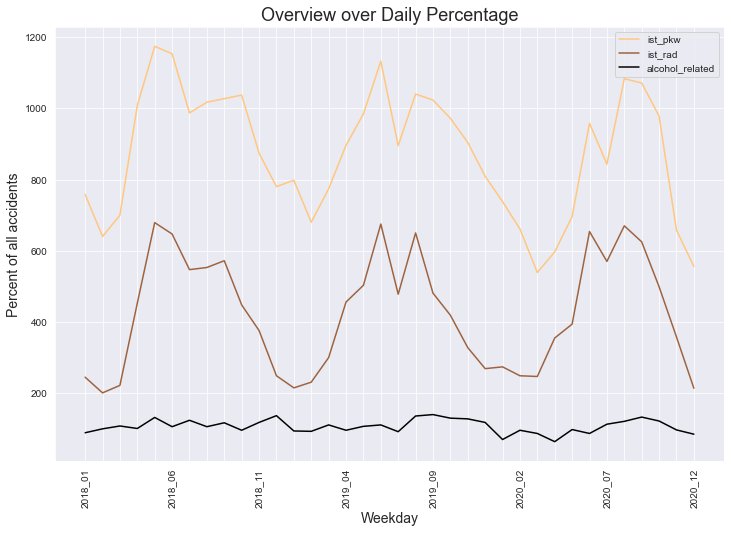

In [215]:
sns.set_style('darkgrid')
data_complete.plot(x="month", y=["ist_pkw", "ist_rad", "alcohol_related"], kind="line", figsize=(12,8), colormap="copper_r")
plt.title("Overview over Daily Percentage", fontsize=18)
plt.xlabel("Weekday", fontsize=14)
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(data_complete), int(len(data_complete) / len(data_complete))))
plt.ylabel("Percent of all accidents", fontsize=14)

plt.show()

In [69]:
# show pdf table contents
for _ in range(len(tables)):
    print(" ***",_,"***")
    print(tables[_])
    print("_____________________________________________")

 *** 0 ***
       Unfallkategorien       1                 2                 3  \
0                   NaN     NaN               NaN               NaN   
1                   NaN  VU mit            VU mit            VU mit   
2      Unfallkategorien     NaN               NaN               NaN   
3                   NaN   Toten  Schwerverletzten  Leichtverletzten   
4                   NaN     NaN               NaN               NaN   
5    Anzahl - insgesamt       1               122               326   
6   darunter § 142 StGB       0                 9                48   
7  Anteil an  Kategorie   0,00%             7,38%            14,72%   

                 4                  6 Unnamed: 0  
0           VU mit   VU mit sonstigem        NaN  
1              NaN                NaN        NaN  
2  schwerwiegendem  Sachschaden unter  Insgesamt  
3              NaN                NaN        NaN  
4      Sachschaden  Alkoholeinwirkung        NaN  
5              150                574      

[64 rows x 4 columns]
_____________________________________________
 *** 59 ***
   AHnzäauhfli -g Pkreoimtsilvle rteilung                       Unnamed: 0  \
0                                     NaN                              NaN   
1                    Pol.Abschnitt Bezirk                              Ort   
2                                   52 KB                     KATZBACHSTR.   
3                                     NaN                      NOSTITZSTR.   
4                                     NaN                         PLANUFER   
..                                    ...                              ...   
59                                    NaN                      RICHARDSTR.   
60                                    NaN  RICHARDSTR. / SCHÖNEWEIDER STR.   
61                                    NaN            SAALESTR. / SAALESTR.   
62                                    NaN                      SIEVERSUFER   
63                                    NaN                     